In [20]:
# Importing the nessecary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense ,Dropout


In [4]:
# Load data
data=pd.read_csv("NSE-TATAGLOBAL.csv")

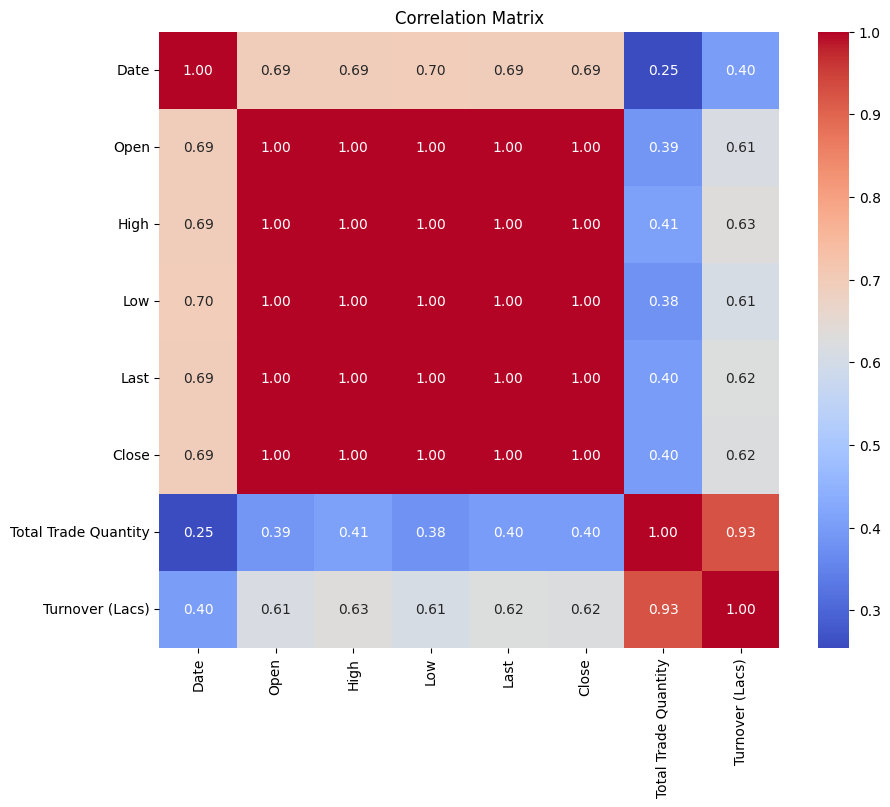

In [11]:
# Exclude non-numeric columns ('Date')
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_df = data[numeric_columns]
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
training_set = data.iloc[:, 1:2].values

In [15]:
# Data preprocessing
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)


Epoch 1/100

62/62 [==============================] - 28s 178ms/step - loss: 0.0087
Epoch 2/100
62/62 [==============================] - 9s 151ms/step - loss: 0.0032
Epoch 3/100
62/62 [==============================] - 10s 161ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 10s 160ms/step - loss: 0.0029
Epoch 5/100
62/62 [==============================] - 9s 141ms/step - loss: 0.0029
Epoch 6/100
62/62 [==============================] - 10s 158ms/step - loss: 0.0020
Epoch 7/100
62/62 [==============================] - 10s 159ms/step - loss: 0.0019
Epoch 8/100
62/62 [==============================] - 10s 169ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 10s 160ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 10s 158ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 9s 151ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 10s 164ms/step - loss: 0.0017
Ep